## East West Airlines Clustering 

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [121]:
df=pd.read_excel("New_EastWestAirlines.xlsx")

In [122]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [123]:
df= df.drop(columns=['ID#'])

In [124]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [125]:
df.duplicated().sum()

1

In [126]:
df=df.drop_duplicates()

In [127]:
df.duplicated().sum()

0

In [128]:
#Checking CoRelation As it Multi Linear Regression using Pearson
df.corr()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


In [129]:
df[df.corr()>80].sum() # No High Correlation Found between Features

Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award?               0.0
dtype: float64

In [130]:
#Checking CoRelation As it Multi Linear Regression using Spearman Rank 
df.corr(method ='spearman')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.125011,0.480641,-0.013020,0.050229,0.568120,0.466611,0.304364,0.301167,0.285366,0.159908
Qual_miles,0.125011,1.000000,0.016437,-0.015239,-0.000622,0.079527,0.082721,0.204745,0.208204,0.028443,0.139095
cc1_miles,0.480641,0.016437,1.000000,-0.073629,0.060351,0.850817,0.679373,0.088796,0.082871,0.228424,0.328030
cc2_miles,-0.013020,-0.015239,-0.073629,1.000000,-0.007012,0.036121,0.063667,0.013411,0.016239,-0.007334,0.005383
cc3_miles,0.050229,-0.000622,0.060351,-0.007012,1.000000,0.103804,0.082696,0.011710,0.009646,0.013032,0.018091
Bonus_miles,0.568120,0.079527,0.850817,0.036121,0.103804,1.000000,0.816988,0.252943,0.245304,0.220397,0.429129
Bonus_trans,0.466611,0.082721,0.679373,0.063667,0.082696,0.816988,1.000000,0.295670,0.296745,0.182334,0.348130
Flight_miles_12mo,0.304364,0.204745,0.088796,0.013411,0.011710,0.252943,0.295670,1.000000,0.991401,0.092888,0.301683
Flight_trans_12,0.301167,0.208204,0.082871,0.016239,0.009646,0.245304,0.296745,0.991401,1.000000,0.092540,0.303693
Days_since_enroll,0.285366,0.028443,0.228424,-0.007334,0.013032,0.220397,0.182334,0.092888,0.092540,1.000000,0.188879


In [131]:
df[df.corr()>80].sum() # No correation Found

Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award?               0.0
dtype: float64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


In [133]:
#No null Values

In [134]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [135]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [136]:
df=df.rename(columns={'Award?':'Award',"cc1_mile":"CC1 Mile","cc2_miles":"CC2 Mile","cc3_miles":"CC3 Mile"})

In [137]:
df.head()

,Balance,Qual_miles,cc1_miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [138]:
df=df.rename(columns={"cc1_miles":"CC1 Miles"})

In [139]:
df.head()

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [140]:
df["CC2 Mile"].value_counts()

1    3955
2      28
3      15
Name: CC2 Mile, dtype: int64

In [141]:
df["CC3 Mile"].value_counts()

1    3980
4       6
5       5
3       4
2       3
Name: CC3 Mile, dtype: int64

In [142]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

xscaled=sc.fit_transform(df)

In [148]:
xscaled=pd.DataFrame(xscaled,columns= df.columns)
xscaled

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [145.0, 145.0, 170.0, 170.0],
  [113.75, 113.75, 157.5, 157.5],
  [95.0, 95.0, 135.625, 135.625],
  [54.375, 54.375, 115.3125, 115.3125],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [211.25, 211.25, 250.0, 250.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [340.0, 340.0, 360.0, 360.0],
  [375.0, 

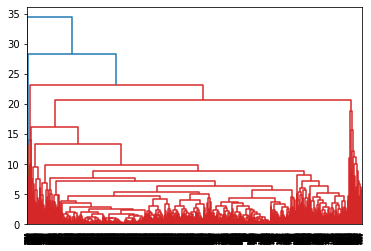

In [152]:

import scipy.cluster.hierarchy as sch

lk = hierarchy.linkage(xscaled, method='complete')
dendrogram = hierarchy.dendrogram(lk)
dendrogram

In [155]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering()
y=agg.fit_predict(xscaled)
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [183]:
xscaled["aggclustersPredictions"]=y # adding Labels to Dataframe
xscaled

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Predictions,Clusters,aggclustersPredictions
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072,1,4,0
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072,1,4,0
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072,1,4,0
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072,1,4,0
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659,1,2,7
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659,1,2,7
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659,0,2,7
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072,1,4,0


In [184]:
xscaled.groupby('Predictions').agg('mean')

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters,aggclustersPredictions
Predictions,,,,,,,,,,,,,
0,0.439553,0.287241,0.978229,-0.098254,0.103432,0.826201,0.774030,0.281144,0.292506,0.275735,0.622101,2.505298,3.341722
1,-0.266771,-0.174330,-0.593700,0.059632,-0.062774,-0.501433,-0.469769,-0.170630,-0.177526,-0.167347,-0.377561,3.650322,1.905145


In [185]:
xscaled["Predictions"].value_counts()

1    2488
0    1510
Name: Predictions, dtype: int64

In [186]:
xscaled[xscaled["Predictions"]==1]

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Predictions,Clusters,aggclustersPredictions
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072,1,4,0
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072,1,4,0
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072,1,4,0
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072,1,4,0
5,-0.567629,-0.186323,-0.769732,-0.098254,-0.062774,-0.710125,-1.208575,-0.328649,-0.362219,1.367144,-0.767072,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,-0.691139,-0.186323,-0.769732,-0.098254,-0.062774,-0.695011,-0.896142,-0.328649,-0.362219,-1.318412,-0.767072,1,4,0
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659,1,2,7
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659,1,2,7
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072,1,4,0


In [187]:
xscaled[xscaled["Predictions"]==0]

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Predictions,Clusters,aggclustersPredictions
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659,0,3,1
6,0.112083,-0.186323,0.682894,-0.098254,-0.062774,0.427872,1.395034,-0.328649,-0.362219,1.392329,-0.767072,0,3,4
9,0.310021,-0.186323,0.682894,-0.098254,-0.062774,0.466962,1.707467,0.492668,0.428689,1.361817,1.303659,0,3,1
11,0.227277,-0.186323,2.135519,-0.098254,-0.062774,1.820160,0.770168,-0.328649,-0.362219,1.358426,1.303659,0,3,1
15,-0.447801,-0.186323,1.409207,-0.098254,-0.062774,1.337209,0.353591,-0.328649,-0.362219,1.352614,1.303659,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,-0.157057,-0.186323,0.682894,-0.098254,-0.062774,0.157762,0.353591,0.526949,0.428689,-1.305335,1.303659,0,2,7
3979,-0.444109,-0.186323,0.682894,-0.098254,-0.062774,0.083640,1.707467,-0.328649,-0.362219,-1.304851,-0.767072,0,3,4
3984,-0.144910,-0.186323,1.409207,-0.098254,-0.062774,0.728665,1.395034,-0.328649,-0.362219,-1.308241,-0.767072,0,3,4
3990,-0.342143,-0.186323,0.682894,-0.098254,-0.062774,-0.089780,1.707467,-0.328649,-0.362219,-1.313084,-0.767072,0,4,4


## K Means Clustering

In [188]:
from sklearn.cluster import KMeans
km = KMeans()
y = km.fit_predict(xscaled)
y

array([0, 0, 0, ..., 2, 0, 0])

In [189]:
# Selection Of K using Elbow method

wcss = []

for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(xscaled)
    wcss.append(km.inertia_)

In [190]:
wcss

[79709.50900450225,
 51695.37351123517,
 39792.45856580249,
 33399.38952534321,
 28226.971416447206,
 24442.813522206663,
 20826.444570046842,
 18082.271220820632,
 16878.61223792836,
 15680.517050272138,
 14818.815367200552,
 14128.757171144269,
 13541.0158730753,
 13111.692600924745,
 12513.935763763573,
 12287.79548123588,
 11980.599291367442,
 11544.145770750643,
 11243.9901281067,
 10962.453837038418,
 10575.19007413541,
 10345.958864316251,
 10175.964903805796,
 9918.802619900525]

Text(0, 0.5, 'WCSS')

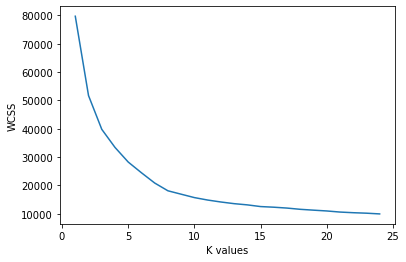

In [191]:
plt.plot(range(1,25), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [192]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
y6 = km.fit_predict(xscaled)
y6

array([0, 0, 0, ..., 4, 0, 0])

In [193]:
y6

array([0, 0, 0, ..., 4, 0, 0])

In [198]:
kmeansscaled=xscaled

In [199]:
kmeansscaled["kmeansClusters"]=y6
kmeansscaled

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Predictions,Clusters,aggclustersPredictions,kmeansClusters
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,-0.767072,1,4,0,0
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,-0.767072,1,4,0,0
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,-0.767072,1,4,0,0
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,-0.767072,1,4,0,0
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,1.303659,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,1.303659,1,2,7,4
3994,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,1.303659,1,2,7,4
3995,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,1.303659,0,2,7,4
3996,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475,-0.767072,1,4,0,0


In [200]:
km.cluster_centers_ # Kmeans clusters

array([[-3.79125785e-01, -1.48169524e-01, -7.33611852e-01,
        -9.82542913e-02, -6.27744600e-02, -6.06620725e-01,
        -6.86604885e-01, -2.15192070e-01, -2.37430392e-01,
        -3.04186299e-01, -7.67071631e-01,  9.86818454e-01,
         4.00000000e+00, -1.77635684e-15],
       [ 2.12939433e-01, -1.20532379e-01,  5.74352713e-01,
         4.31459559e-01, -4.84675229e-02,  1.80076927e-01,
         5.69588371e-01, -2.00807026e-01, -2.19354958e-01,
         1.88187444e-01, -7.20798316e-01,  5.43296089e-01,
         3.62709497e+00,  4.06703911e+00],
       [ 1.17568429e+00,  5.99381861e-01,  1.95150989e-01,
         6.18262593e-04, -6.27744600e-02,  7.37893532e-01,
         1.80248946e+00,  3.87584238e+00,  4.16000246e+00,
         2.77752229e-01,  8.65329327e-01,  3.64963504e-02,
         3.64963504e-02,  2.10218978e+00],
       [ 6.93104837e-01, -8.94130340e-02,  1.63572992e+00,
        -9.82542913e-02, -5.43225071e-02,  1.57951318e+00,
         9.19510381e-01, -1.89926172e-02, -3.

In [201]:
kmeansscaled.groupby("kmeansClusters").agg('mean')

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Predictions,Clusters,aggclustersPredictions
kmeansClusters,,,,,,,,,,,,,,
0,-0.379126,-0.148170,-0.733612,-0.098254,-0.062774,-0.606621,-0.686605,-0.215192,-0.237430,-0.304186,-0.767072,0.986818,4.000000,0.000000
1,0.212939,-0.120532,0.574353,0.431460,-0.048468,0.180077,0.569588,-0.200807,-0.219355,0.188187,-0.720798,0.543296,3.627095,4.067039
2,1.175684,0.599382,0.195151,0.000618,-0.062774,0.737894,1.802489,3.875842,4.160002,0.277752,0.865329,0.036496,0.036496,2.102190
3,0.693105,-0.089413,1.635730,-0.098254,-0.054323,1.579513,0.919510,-0.018993,-0.003744,0.469848,1.002959,0.000000,3.000000,1.000000
4,-0.129107,0.358985,-0.257490,-0.098254,-0.062774,-0.260177,-0.107324,-0.019936,-0.017797,0.054469,1.245533,0.522807,2.051462,6.941520
5,0.639501,-0.084469,1.021840,-0.098254,15.644335,3.179317,1.714410,0.033207,0.059598,0.239582,0.337318,0.000000,1.000000,3.000000


## Dbscan Clustering

In [228]:
dbscandf=pd.read_excel("New_EastWestAirlines.xlsx")

In [229]:
dbscandf= dbscandf.drop(columns=['ID#'])

In [230]:
dbscandf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [234]:
dbscandf=dbscandf.rename(columns={'Award?':'Award',"cc1_mile":"CC1 Mile","cc2_miles":"CC2 Mile","cc3_miles":"CC3 Mile"})

In [235]:
dbscandf=dbscandf.rename(columns={"cc1_miles":"CC1 Miles"})

In [236]:
dbscandf.head()

,Balance,Qual_miles,CC1 Miles,CC2 Mile,CC3 Mile,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [237]:
df.duplicated().sum()

0

In [238]:
from sklearn.preprocessing import StandardScaler

dbsc=StandardScaler()

dbscaled=dbsc.fit_transform(dbscandf)

In [239]:
dbscaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [256]:
db=DBSCAN()
dbscan_data= db.fit_predict(dbscaled)

In [257]:
silhouette_score(dbscaled,dbscan_data)

-0.07834757831741163

In [258]:
from sklearn.model_selection import GridSearchCV

params={'eps':[0.01,0.005],
         'min_samples': [1,2,3,4,5,6,7,8,9,10]}

grid=GridSearchCV(DBSCAN(),param_grid=params,cv=5,scoring='accuracy')
grid.fit(dbscaled)

GridSearchCV(cv=5, estimator=DBSCAN(),
             param_grid={'eps': [0.01, 0.005],
                         'min_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [260]:
grid.best_params_

{'eps': 0.01, 'min_samples': 1}

In [261]:
db=DBSCAN(eps= 0.1, min_samples=1)
dbscan_data= db.fit_predict(dbscaled)

In [262]:
silhouette_score(dbscaled,dbscan_data)

-0.021038216193665218